### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='dark',)

### Import data

In [2]:
movie_path = '../assets/movie.pkl'
rating_path = '../assets/rating.pkl'
movie = pd.read_pickle(movie_path)
rating = pd.read_pickle(rating_path)

### Data Viz

#### Movie

In [3]:
movie.head()

,movieId,clean_movie_title,released_year,genre_counts,new_genres,groupped_released_year,action,adventure,animation,children,...,imax,missing,musical,mystery,noir,romance,sci,thriller,war,western
0,1,Toy Story,1995,5,"Adventure,Animation,Children,Comedy,Fantasy",1990s,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,3,"Adventure,Children,Fantasy",1990s,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,2,"Comedy,Romance",1990s,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,3,"Comedy,Drama,Romance",1990s,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,1,Comedy,1990s,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- movieId

In [4]:
unique_movies = movie.movieId.nunique()
print(f"There are {unique_movies} unique movies in our dataset. ")

There are 62423 unique movies in our dataset. 


- title

In [5]:
movie.loc[:, 'movie_title_word_count'] = movie.clean_movie_title.apply(lambda title: len(title.strip()))

/var/folders/t9/5hgq421x4xsgvkp8nd2kx4fw0000gn/T/ipykernel_4735/2406818424.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie.movie_title_word_count,


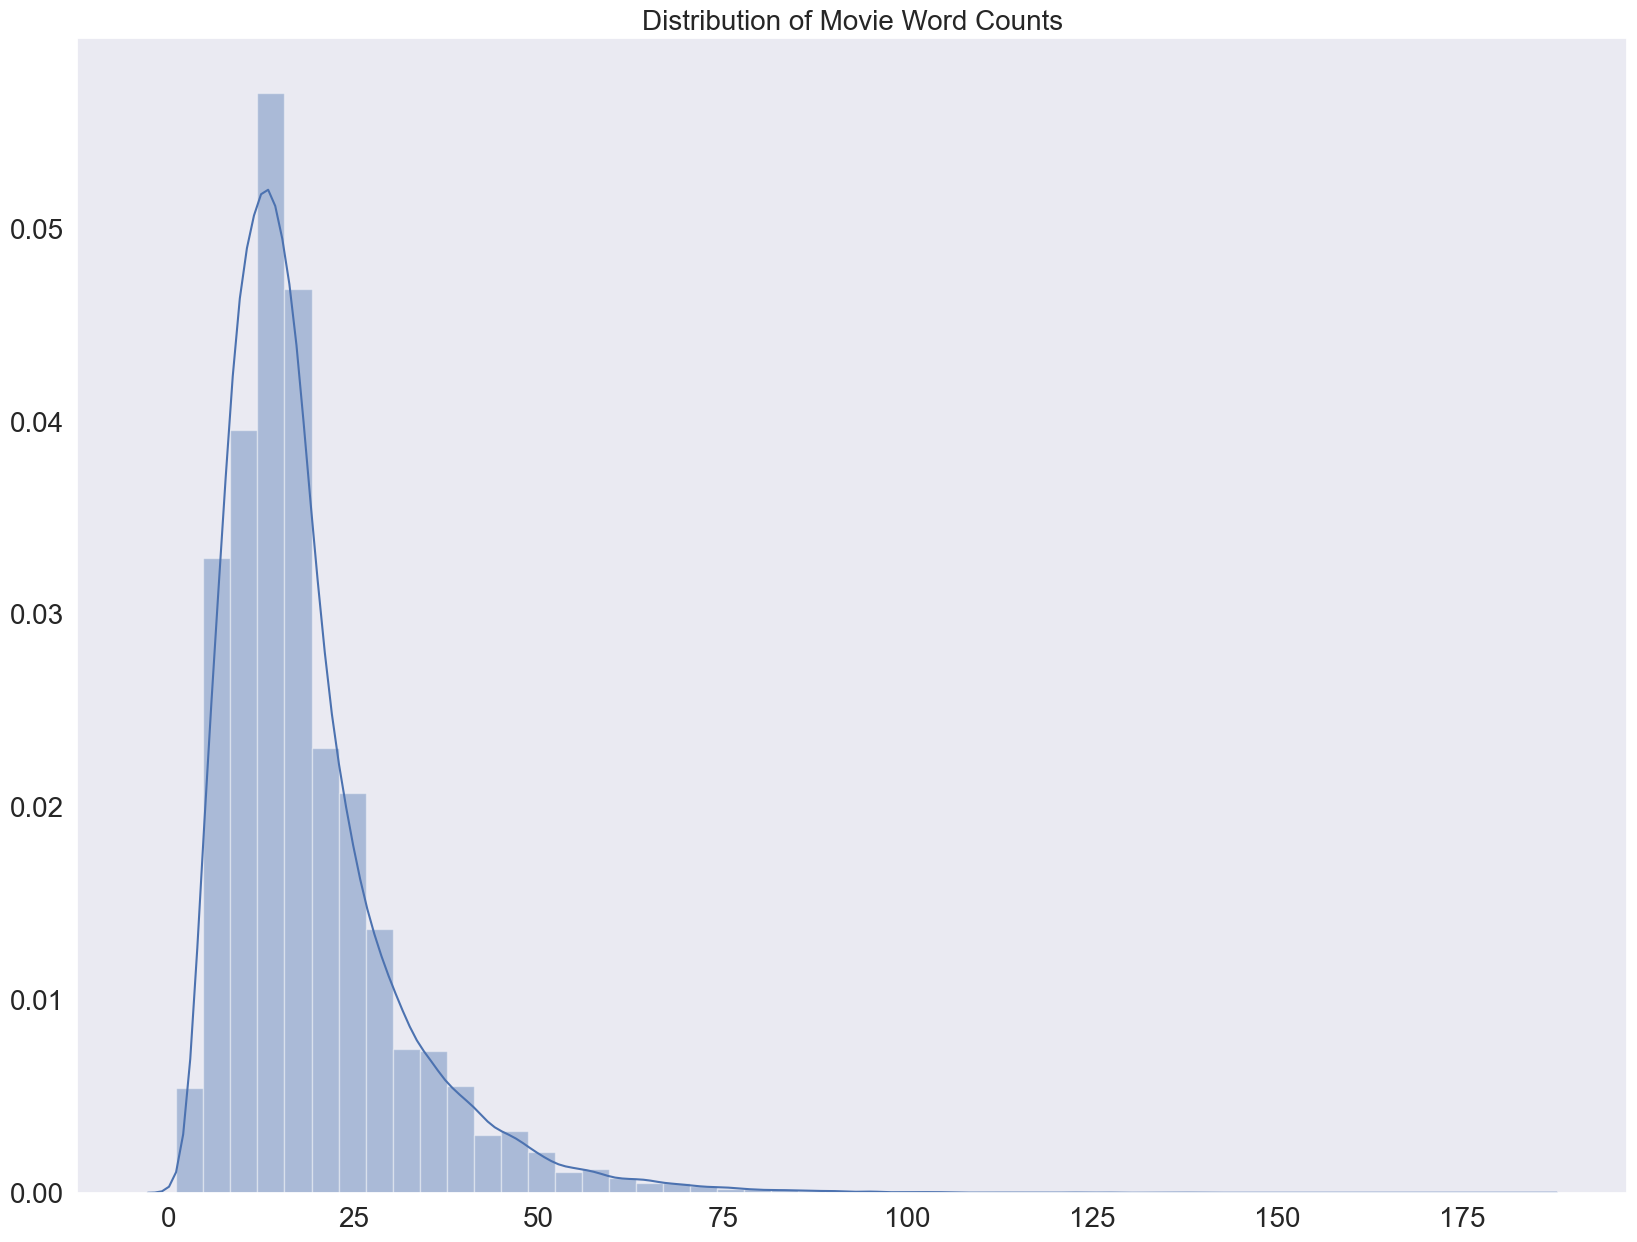

In [6]:
plt.figure(figsize = (20, 15))
plt.title("Distribution of Movie Word Counts", fontsize = 20)
sns.distplot(movie.movie_title_word_count, 
             fit_kws={"color":"blue", "alpha":0.7})
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

- genre counts

In [7]:
genre_counts_df = pd.DataFrame(movie.genre_counts.value_counts())\
.reset_index().rename(columns = {'index':'genre_counts', 'genre_counts':'freq'})

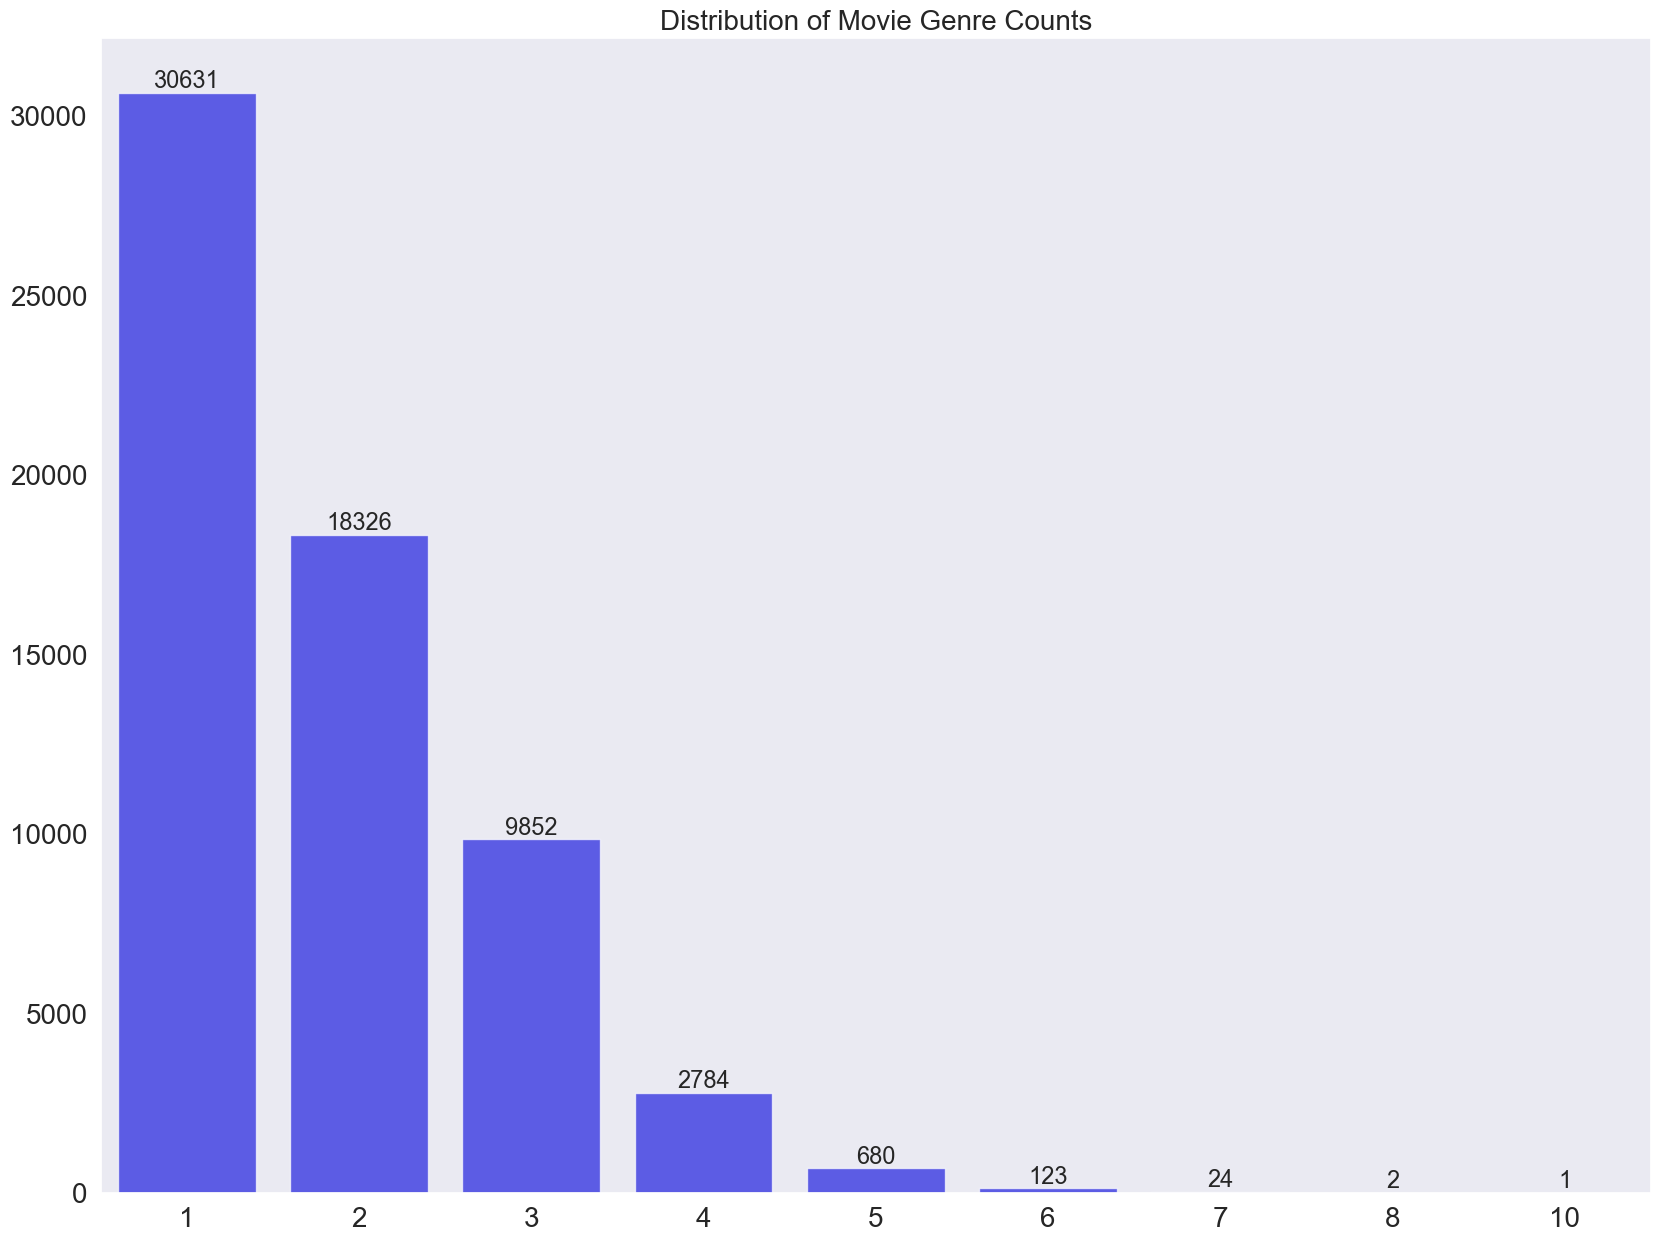

In [8]:
plt.figure(figsize = (20, 15))
plt.title("Distribution of Movie Genre Counts", fontsize = 20)
genre_counts_plot = sns.barplot(
    x = 'genre_counts',
    y = 'freq', 
    data = genre_counts_df,
    color = 'blue', 
    alpha = 0.7)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in genre_counts_plot.containers:
    genre_counts_plot.bar_label(container, fontsize = 17);

- groupped_released_year

In [9]:
year_counts_df = pd.DataFrame(movie.groupped_released_year.value_counts())\
                .reset_index().rename(columns = {'index':'groupped_year', 'groupped_released_year':'freq'})

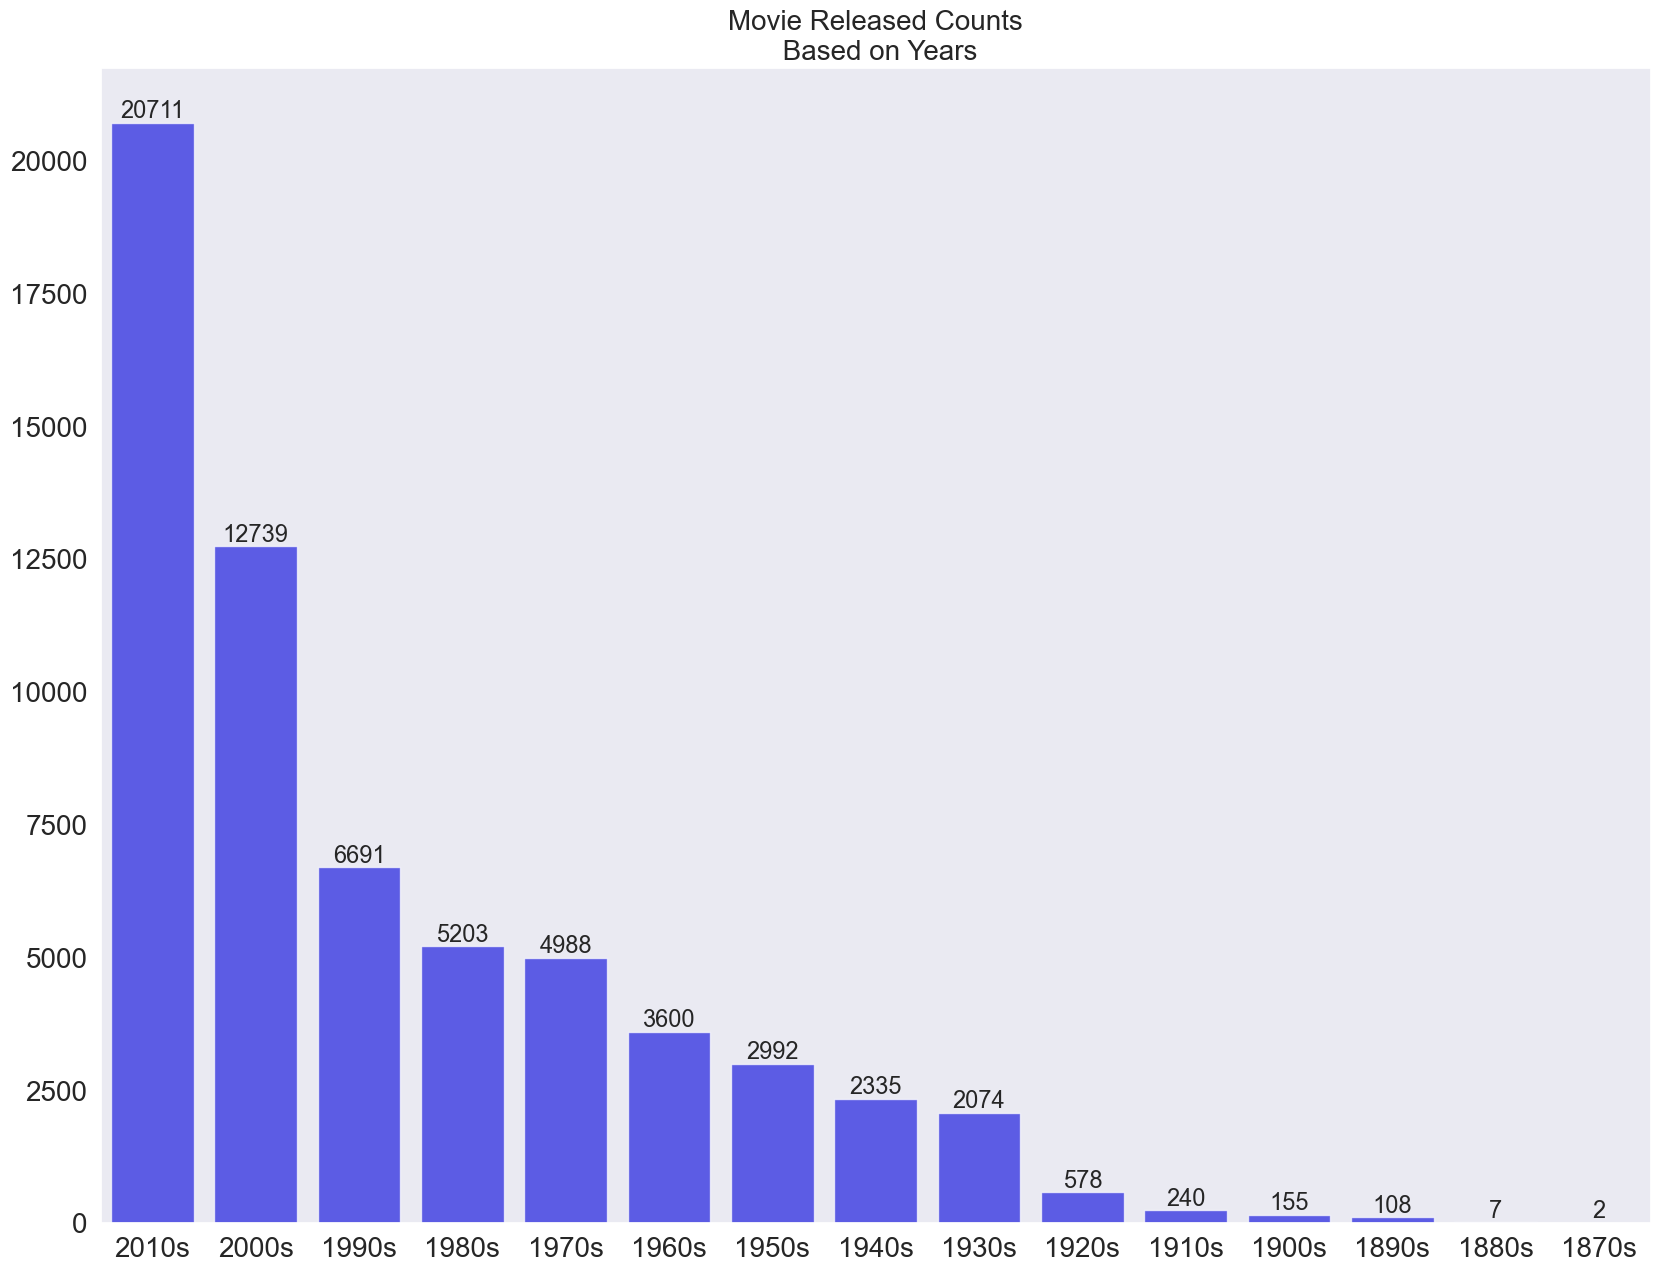

In [10]:
plt.figure(figsize = (20, 15))
plt.title("Movie Released Counts\n Based on Years", fontsize = 20)
year_counts_plot = sns.barplot(
    x = 'groupped_year',
    y = 'freq', 
    data = year_counts_df,
    color = 'blue', 
    alpha = 0.7)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in year_counts_plot.containers:
    year_counts_plot.bar_label(container, fontsize = 17);

- genre

In [11]:
movie_genre_only_features = list(movie.columns[7:-1])

In [12]:
genres_only = movie[movie_genre_only_features]

In [13]:
genre_dict = {}
genres = list(genres_only.columns)

for genre in genres:
    if genre not in genre_dict:
        genre_dict[genre] = np.sum(genres_only[genre])

In [14]:
genre_in_df = pd.DataFrame.from_records(genre_dict, index = [len(genre_dict)]).T.reset_index()\
.rename(columns = {'index':'genre', 21:'freq'})

In [15]:
genre_in_df.loc[:, 'genre'] = genre_in_df.genre.apply(lambda row: str(row).title())

In [16]:
genre_in_df.sort_values(by = 'freq', ascending = False, inplace = True)

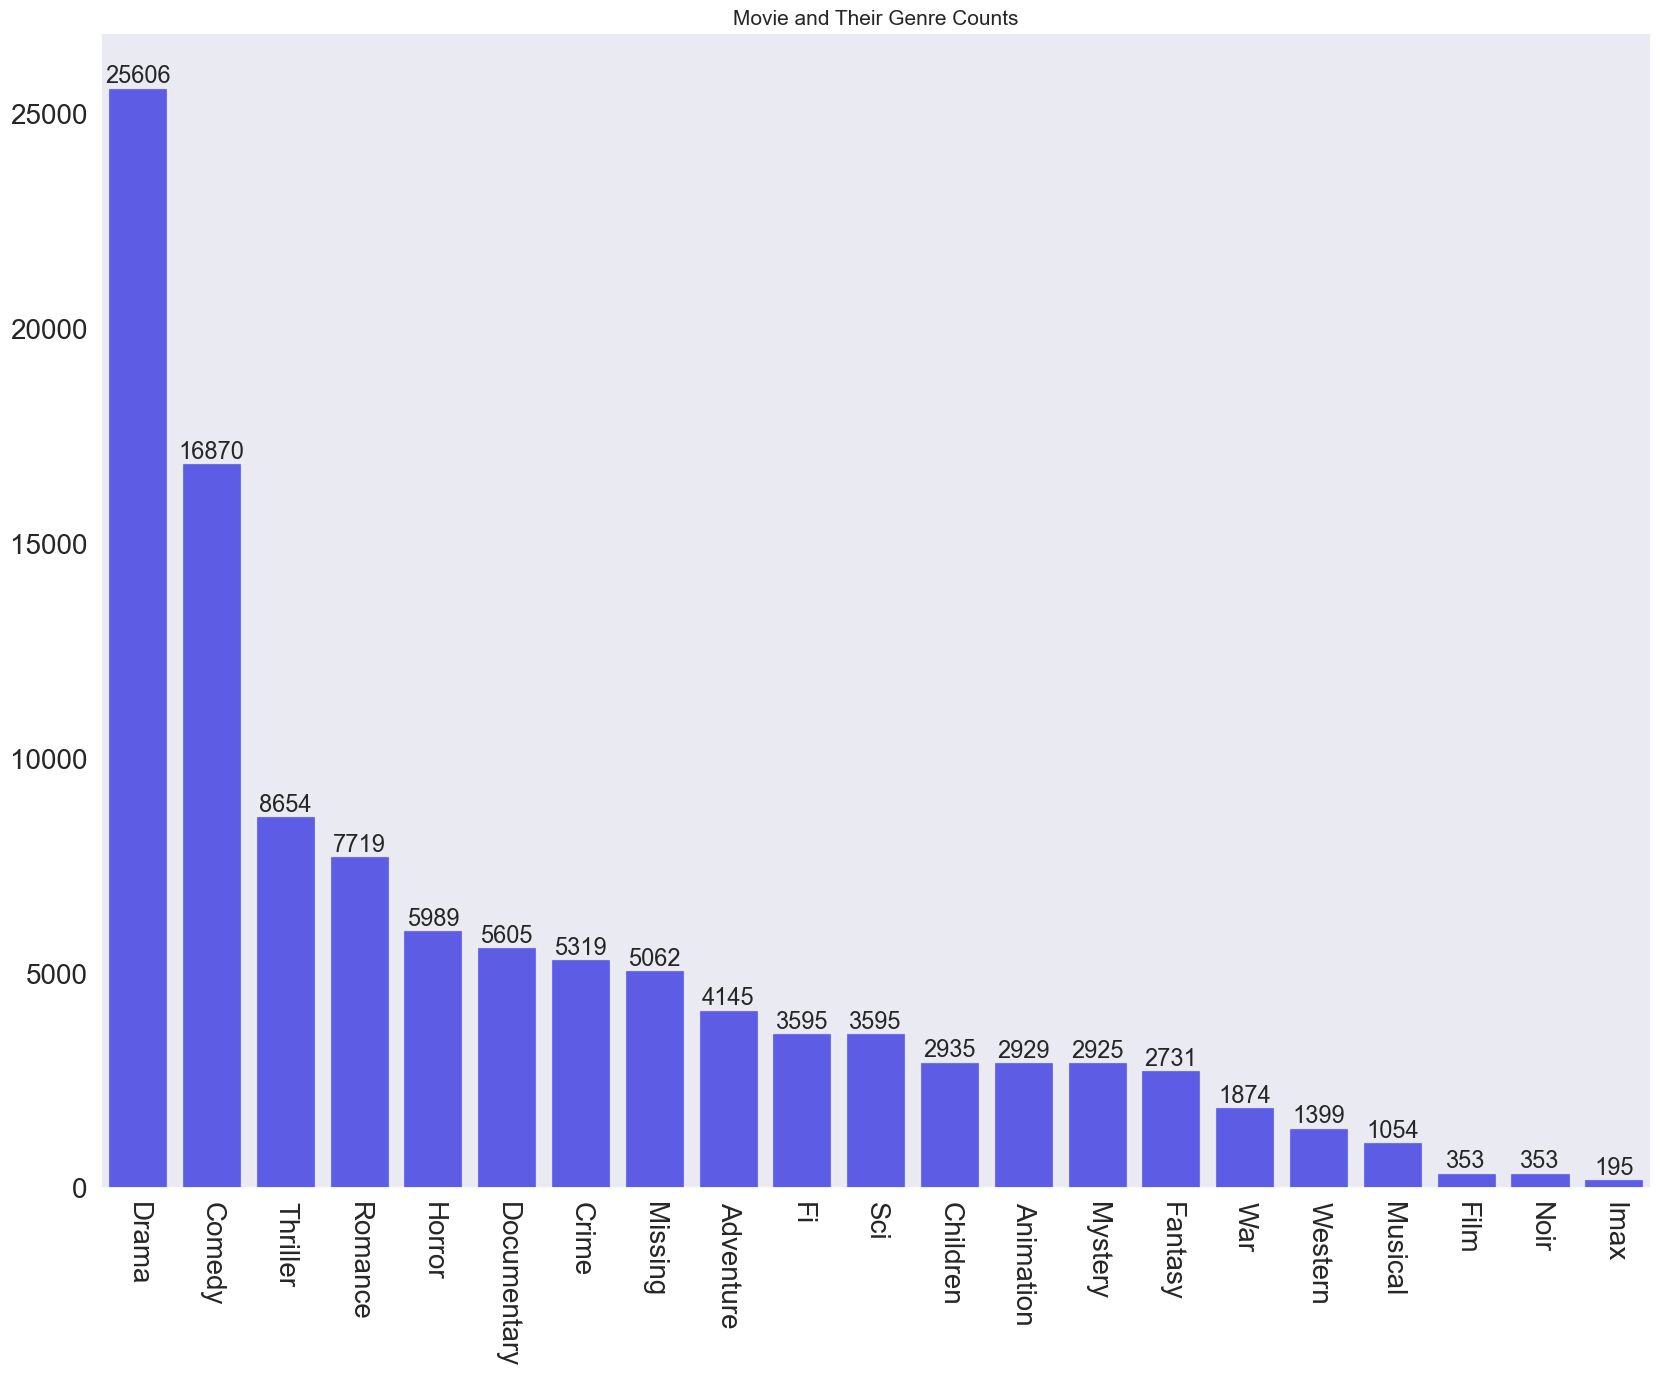

In [17]:
plt.figure(figsize = (20, 15))
plt.title("Movie and Their Genre Counts", fontsize = 15)
viz_genre = sns.barplot(
    x = 'genre',
    y = 'freq', 
    data = genre_in_df,
    color = 'blue', 
    alpha = 0.7)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20, rotation = 270)
plt.yticks(fontsize = 20)

for container in viz_genre.containers:
    viz_genre.bar_label(container, fontsize = 17);

#### Rating

In [18]:
rating.head()

,userId,movieId,rating,review_datetime,review_year,review_quarter,review_month,review_day,review_dayname
0,1,296,5.0,2006-05-17 15:34:04,2006,2,5,17,Wednesday
1,1,306,3.5,2006-05-17 12:26:57,2006,2,5,17,Wednesday
2,1,307,5.0,2006-05-17 12:27:08,2006,2,5,17,Wednesday
3,1,665,5.0,2006-05-17 15:13:40,2006,2,5,17,Wednesday
4,1,899,3.5,2006-05-17 12:21:50,2006,2,5,17,Wednesday


In [19]:
unique_users = rating.userId.nunique()
unique_movies_rated = rating.movieId.nunique()

print(f"There are {unique_users} users who reviewed their movies in our dataset.")
print(f"There are {unique_movies_rated} unique movies that were rated by our users.")

There are 162541 users who reviewed their movies in our dataset.
There are 59047 unique movies that were rated by our users.


- popularities

In [20]:
movie_low = rating.movieId.value_counts().describe()['25%']
movie_high = rating.movieId.value_counts().describe()['75%']

In [21]:
movie_reivew_counts = rating.groupby('movieId').count()[['rating']].reset_index()
movie_reivew_counts.rename(columns = {'rating':'rating_counts'}, inplace = True)

In [22]:
new_rating = pd.merge(rating,
         movie_reivew_counts, 
         left_on = ['movieId'], 
         right_on = ['movieId'])

In [23]:
new_rating.loc[:, 'movie_popularities'] = new_rating.rating_counts.apply(lambda row: 'low' if row <= movie_low\
                                                                        else('medium' if row <= movie_high else 'high'))

In [24]:
new_rating.loc[:, 'groupped_year'] = new_rating.review_year.apply(lambda year: str(year)[:3] + '0s')

In [25]:
new_rating.head()

,userId,movieId,rating,review_datetime,review_year,review_quarter,review_month,review_day,review_dayname,rating_counts,movie_popularities,groupped_year
0,1,296,5.0,2006-05-17 15:34:04,2006,2,5,17,Wednesday,79672,high,2000s
1,3,296,5.0,2015-08-13 14:01:16,2015,3,8,13,Thursday,79672,high,2010s
2,4,296,4.0,2019-11-16 21:14:58,2019,4,11,16,Saturday,79672,high,2010s
3,5,296,4.0,1996-04-29 13:55:55,1996,2,4,29,Monday,79672,high,1990s
4,7,296,4.0,1996-06-22 11:58:50,1996,2,6,22,Saturday,79672,high,1990s


In [26]:
popularities_by_year_group = new_rating.groupby(['movie_popularities', 'groupped_year']).count()[['rating']]

In [27]:
popularities_by_year_group = popularities_by_year_group.reset_index().rename(columns= {'rating':'freq'})

In [28]:
popularities_by_year_group

,movie_popularities,groupped_year,freq
0,high,1990s,3385425
1,high,2000s,10931563
2,high,2010s,10394602
3,low,2000s,60
4,low,2010s,25504
5,medium,1990s,2052
6,medium,2000s,19158
7,medium,2010s,241731


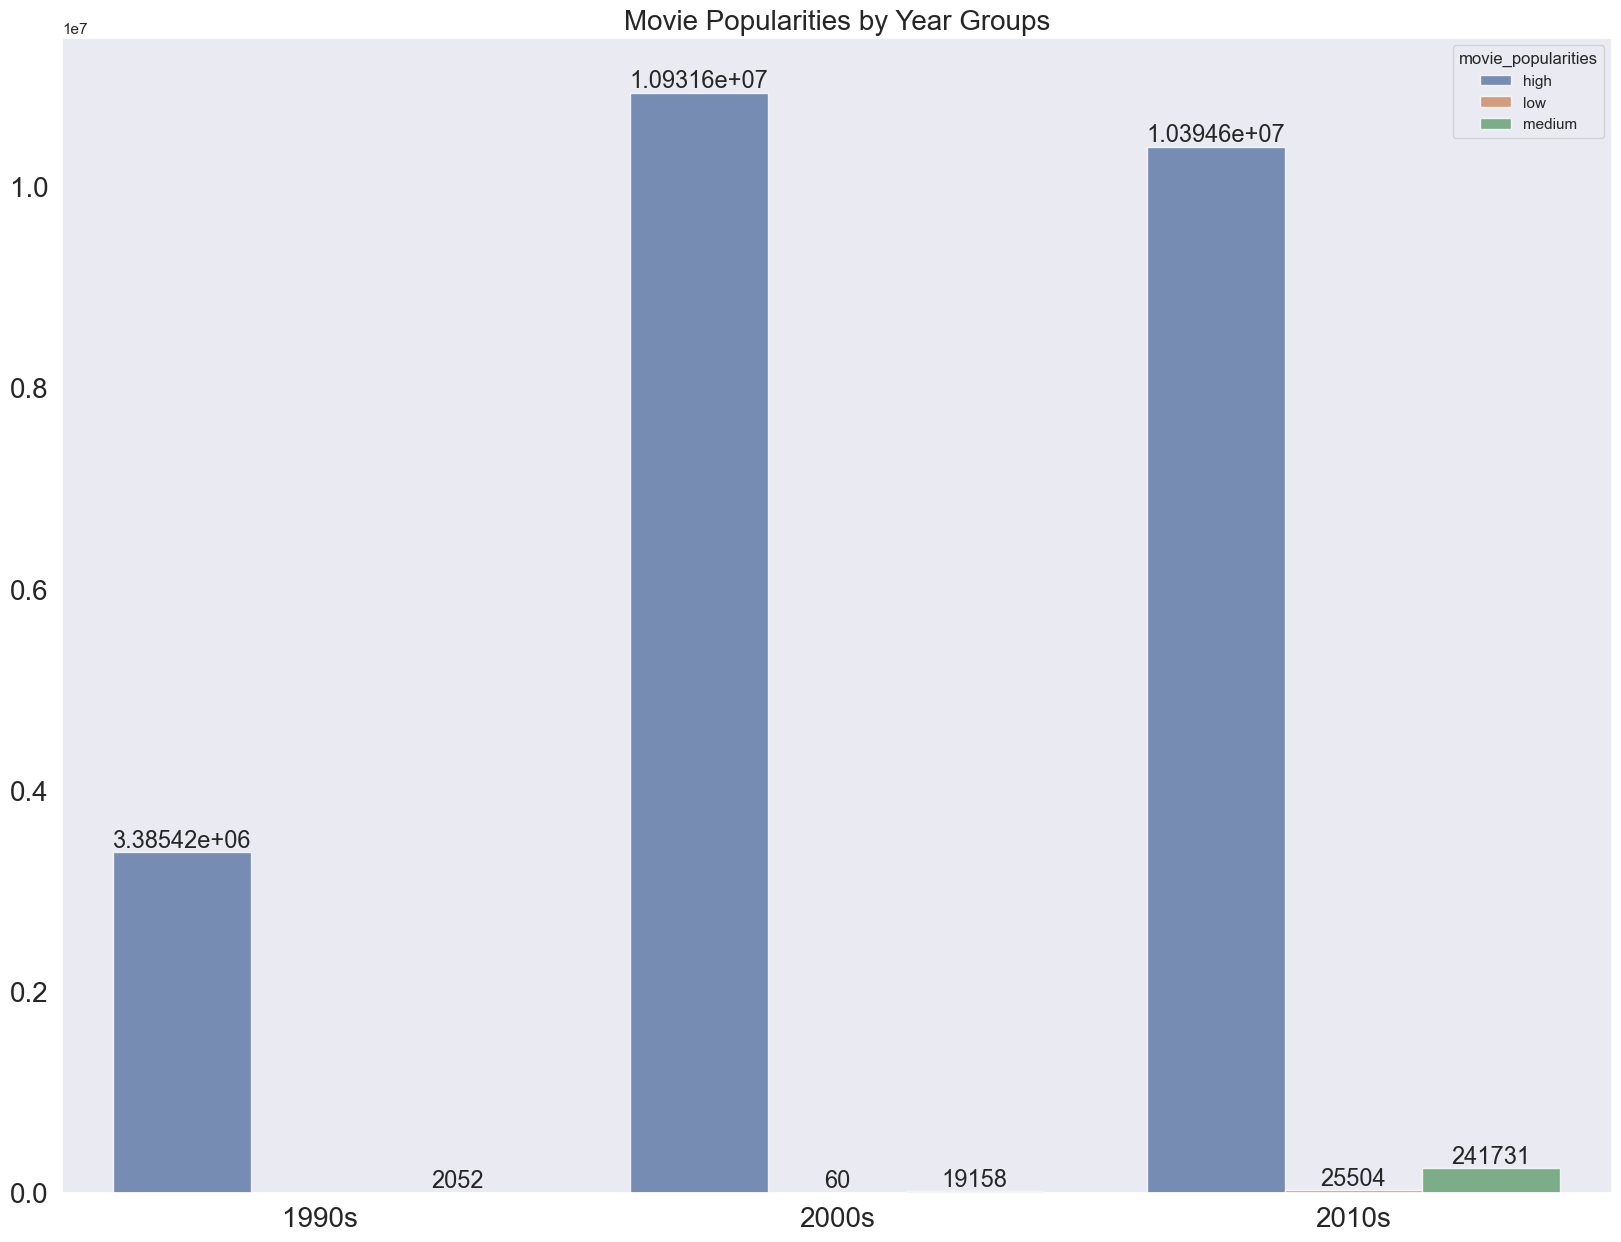

In [29]:
plt.figure(figsize = (20, 15))
plt.title("Movie Popularities by Year Groups", fontsize = 20)
movie_pop = sns.barplot(
    x = "groupped_year",
    y = "freq",
    hue = "movie_popularities",
    data = popularities_by_year_group,
    alpha = 0.8)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in movie_pop.containers:
    movie_pop.bar_label(container, fontsize = 17);

- review years

In [30]:
max(new_rating.review_year), min(new_rating.review_year)

(2019, 1995)

a pretty large gap -> select top 8

In [31]:
review_by_year = pd.DataFrame(new_rating.review_year.value_counts()/10000).reset_index()\
.rename(columns = {'index':'year', 'review_year':'freq'})

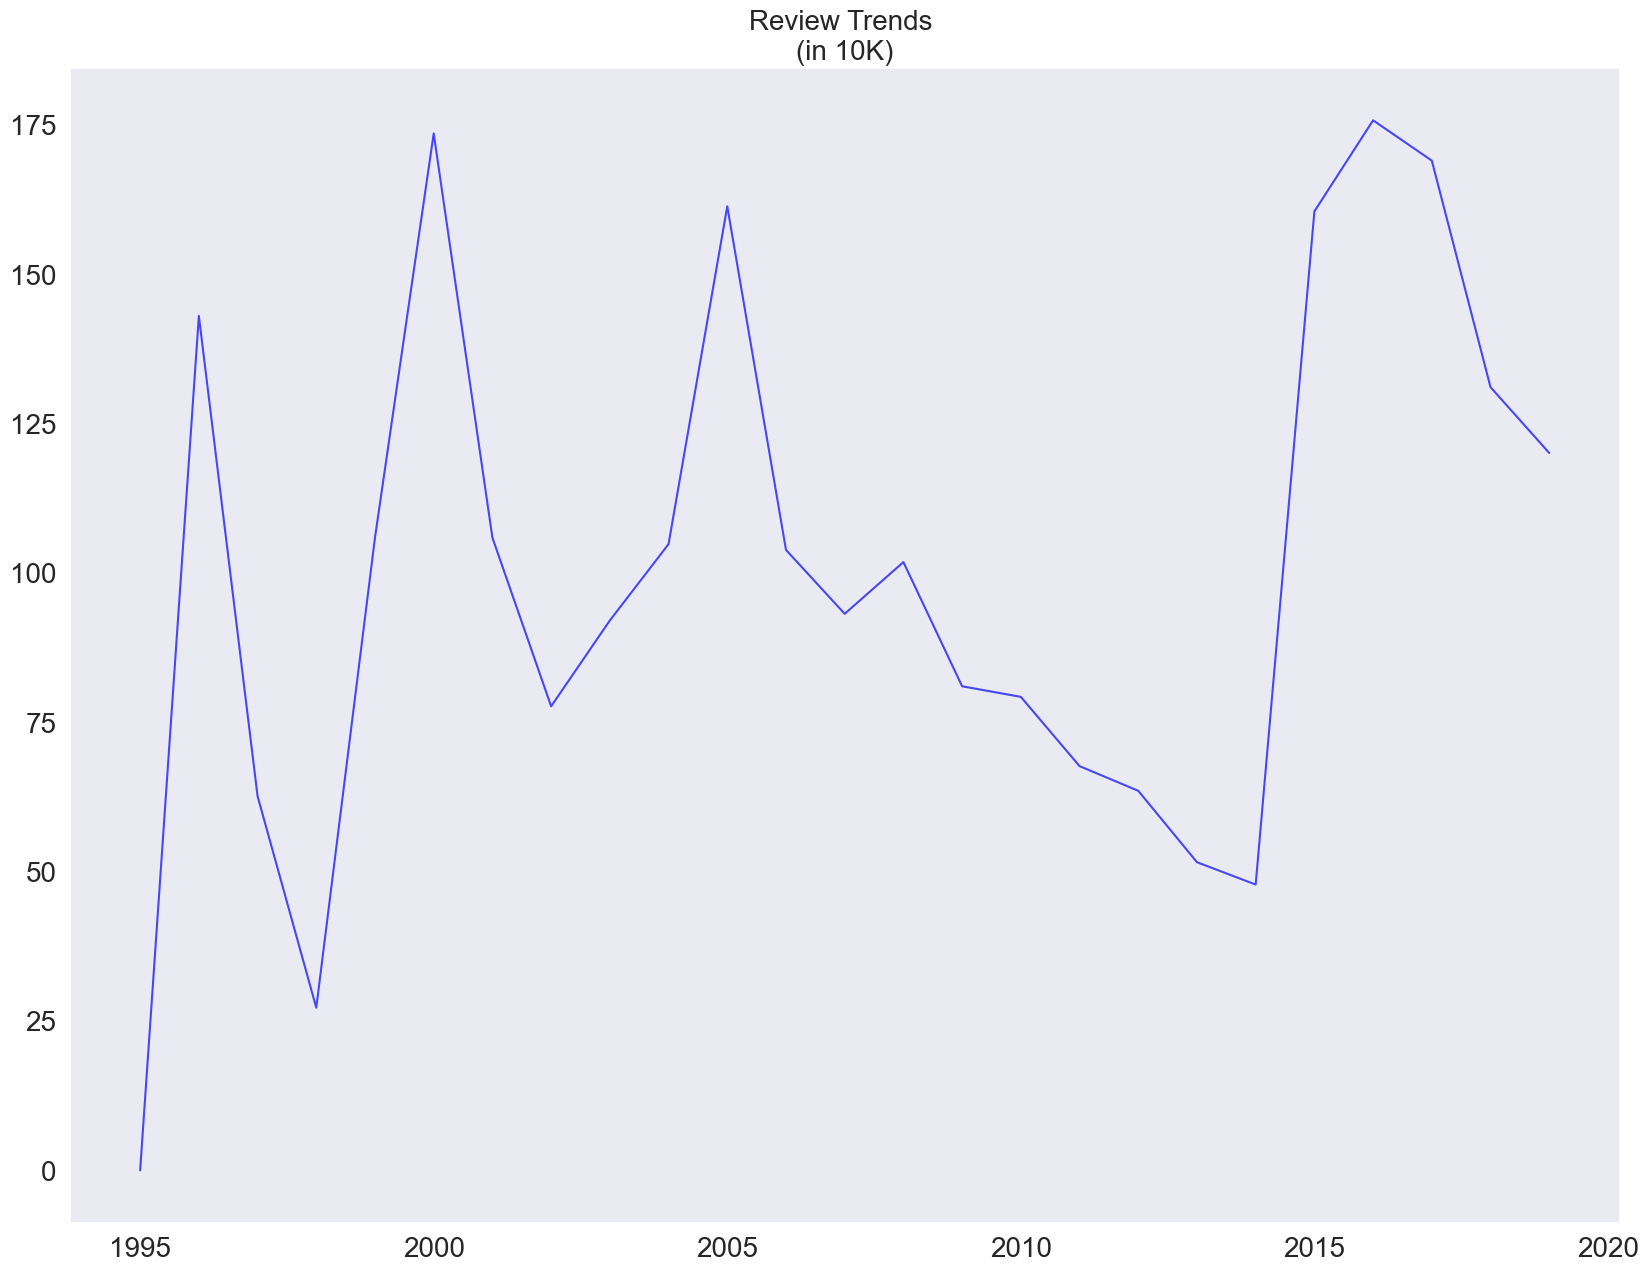

In [32]:
plt.figure(figsize = (20, 15))
plt.title("Review Trends \n(in 10K)", fontsize = 20)
review_years = sns.lineplot(
    x = review_by_year.year,
    y = review_by_year.freq,
    color = 'blue',
    alpha = 0.7)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

- review quarter

In [33]:
review_by_quarter = pd.DataFrame(new_rating.review_quarter.value_counts()/10000).reset_index()\
.rename(columns = {'index':'quarter', 'review_quarter':'freq'})

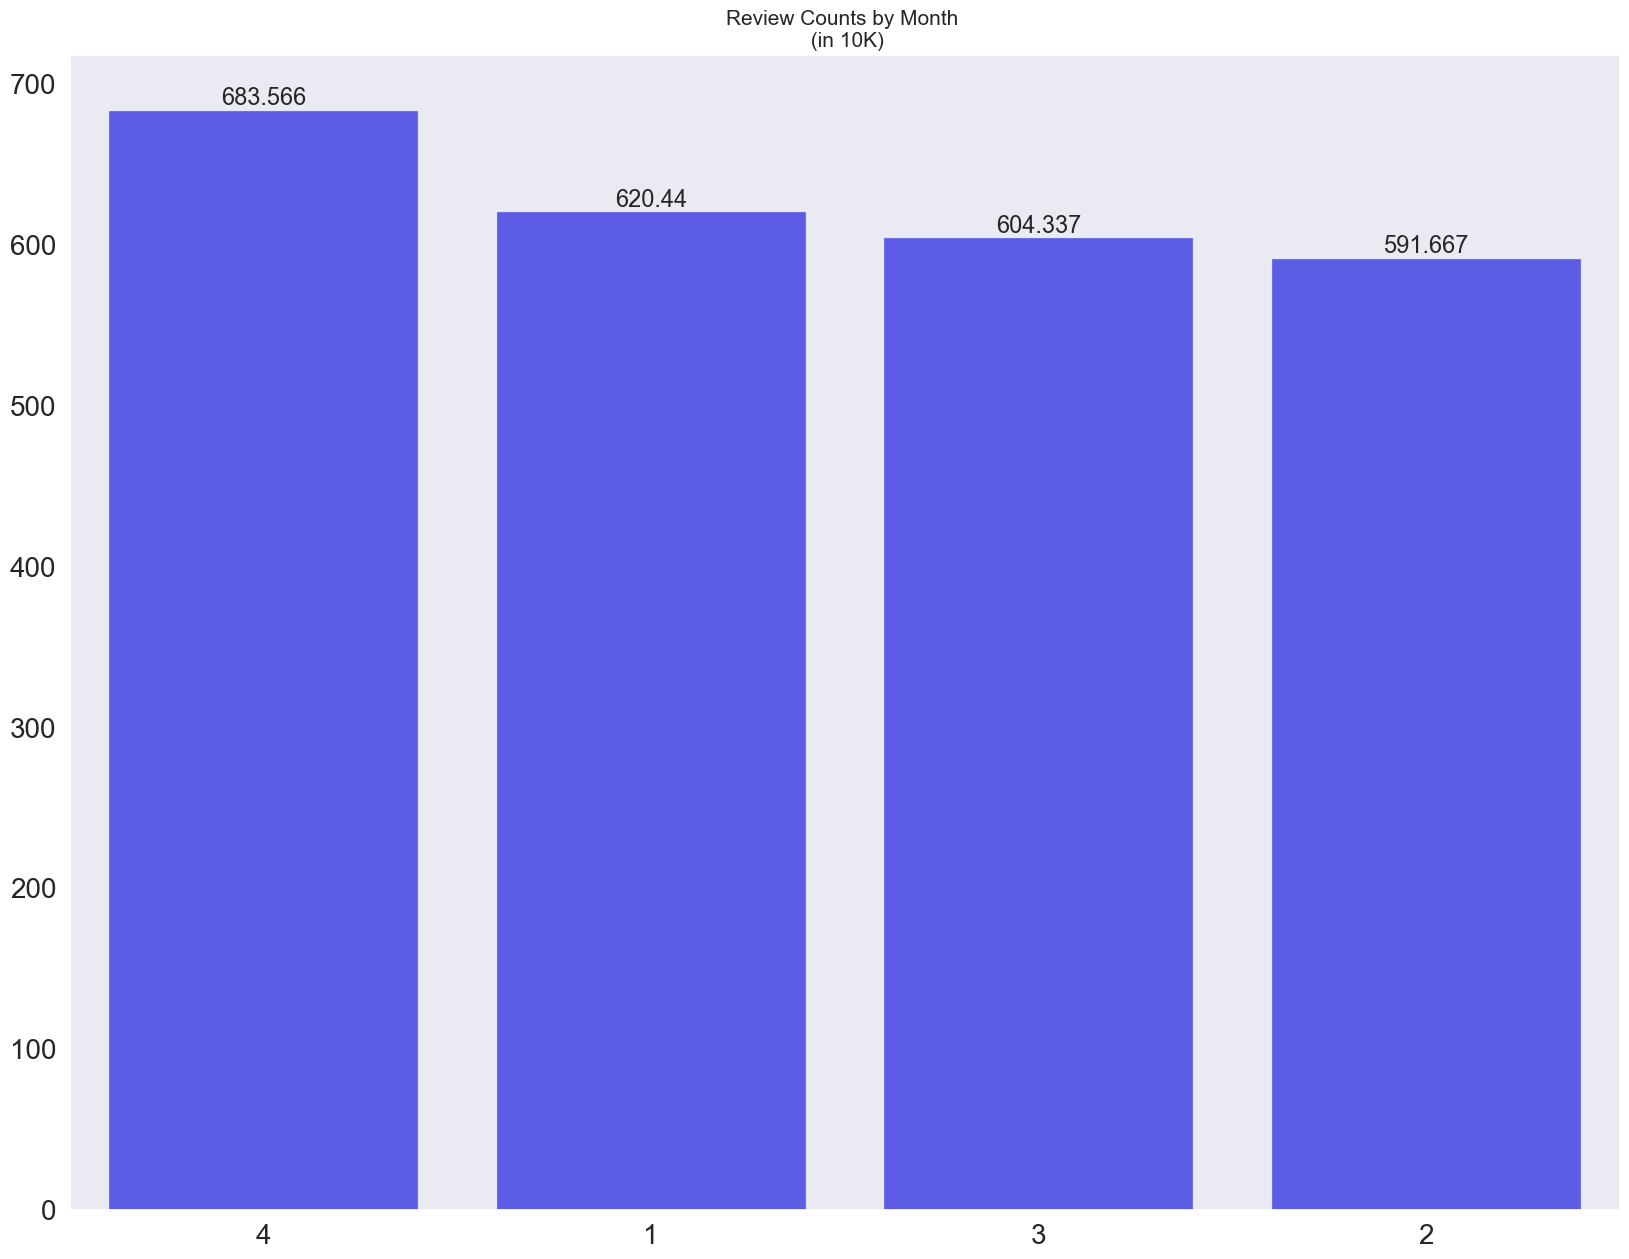

In [34]:
plt.figure(figsize = (20, 15))
plt.title("Review Counts by Month \n (in 10K)", fontsize = 15)
viz_quarter = sns.barplot(
    x = 'quarter',
    y = 'freq', 
    data = review_by_quarter,
    color = 'blue', 
    alpha = 0.7,
    order = review_by_quarter['quarter'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in viz_quarter.containers:
    viz_quarter.bar_label(container, fontsize = 17);

- review month

In [35]:
review_by_month = pd.DataFrame(new_rating.review_month.value_counts()/10000).reset_index()\
.rename(columns = {'index':'month', 'review_month':'freq'})

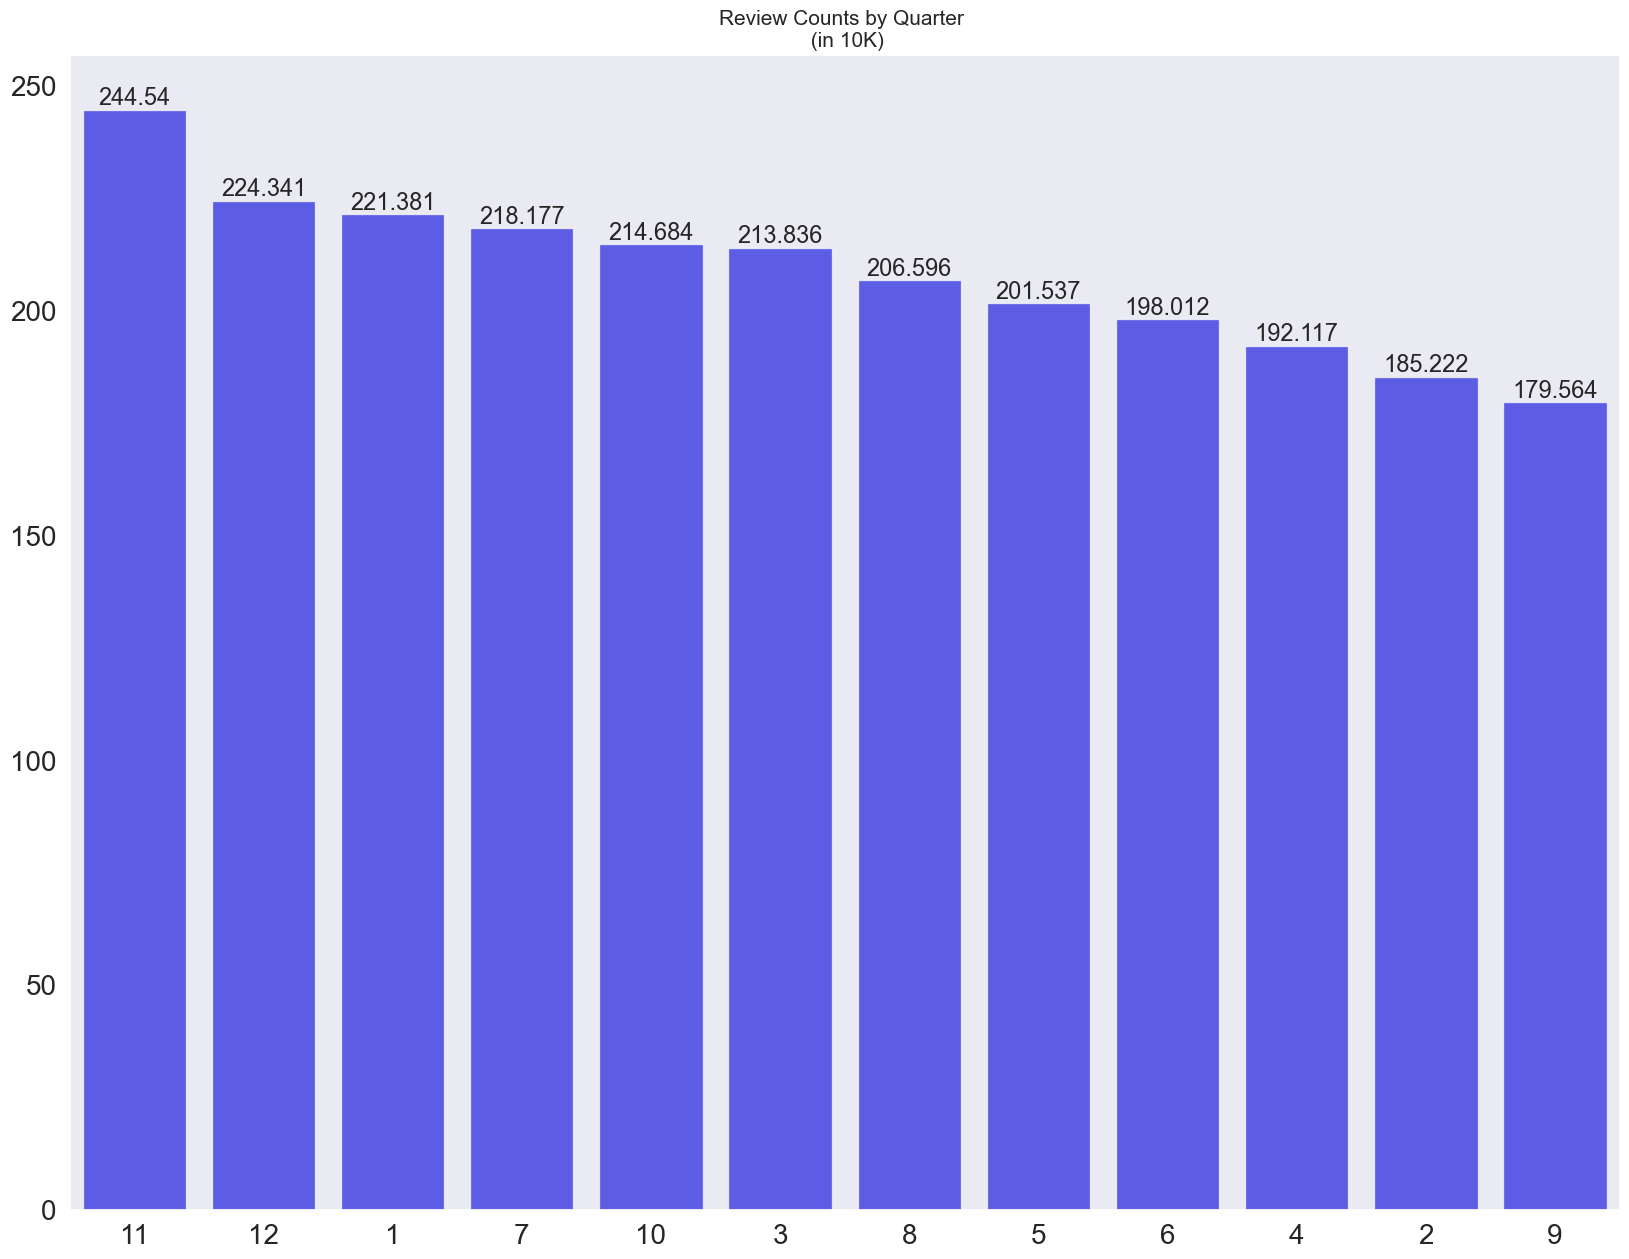

In [36]:
plt.figure(figsize = (20, 15))
plt.title("Review Counts by Quarter \n (in 10K)", fontsize = 15)
viz_month = sns.barplot(
    x = 'month',
    y = 'freq', 
    data = review_by_month,
    color = 'blue', 
    alpha = 0.7,
    order = review_by_month['month'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in viz_month.containers:
    viz_month.bar_label(container, fontsize = 17);

- review days

In [37]:
review_by_days = pd.DataFrame(new_rating.review_dayname.value_counts()/10000).reset_index()\
.rename(columns = {'index':'days', 'review_dayname':'freq'})

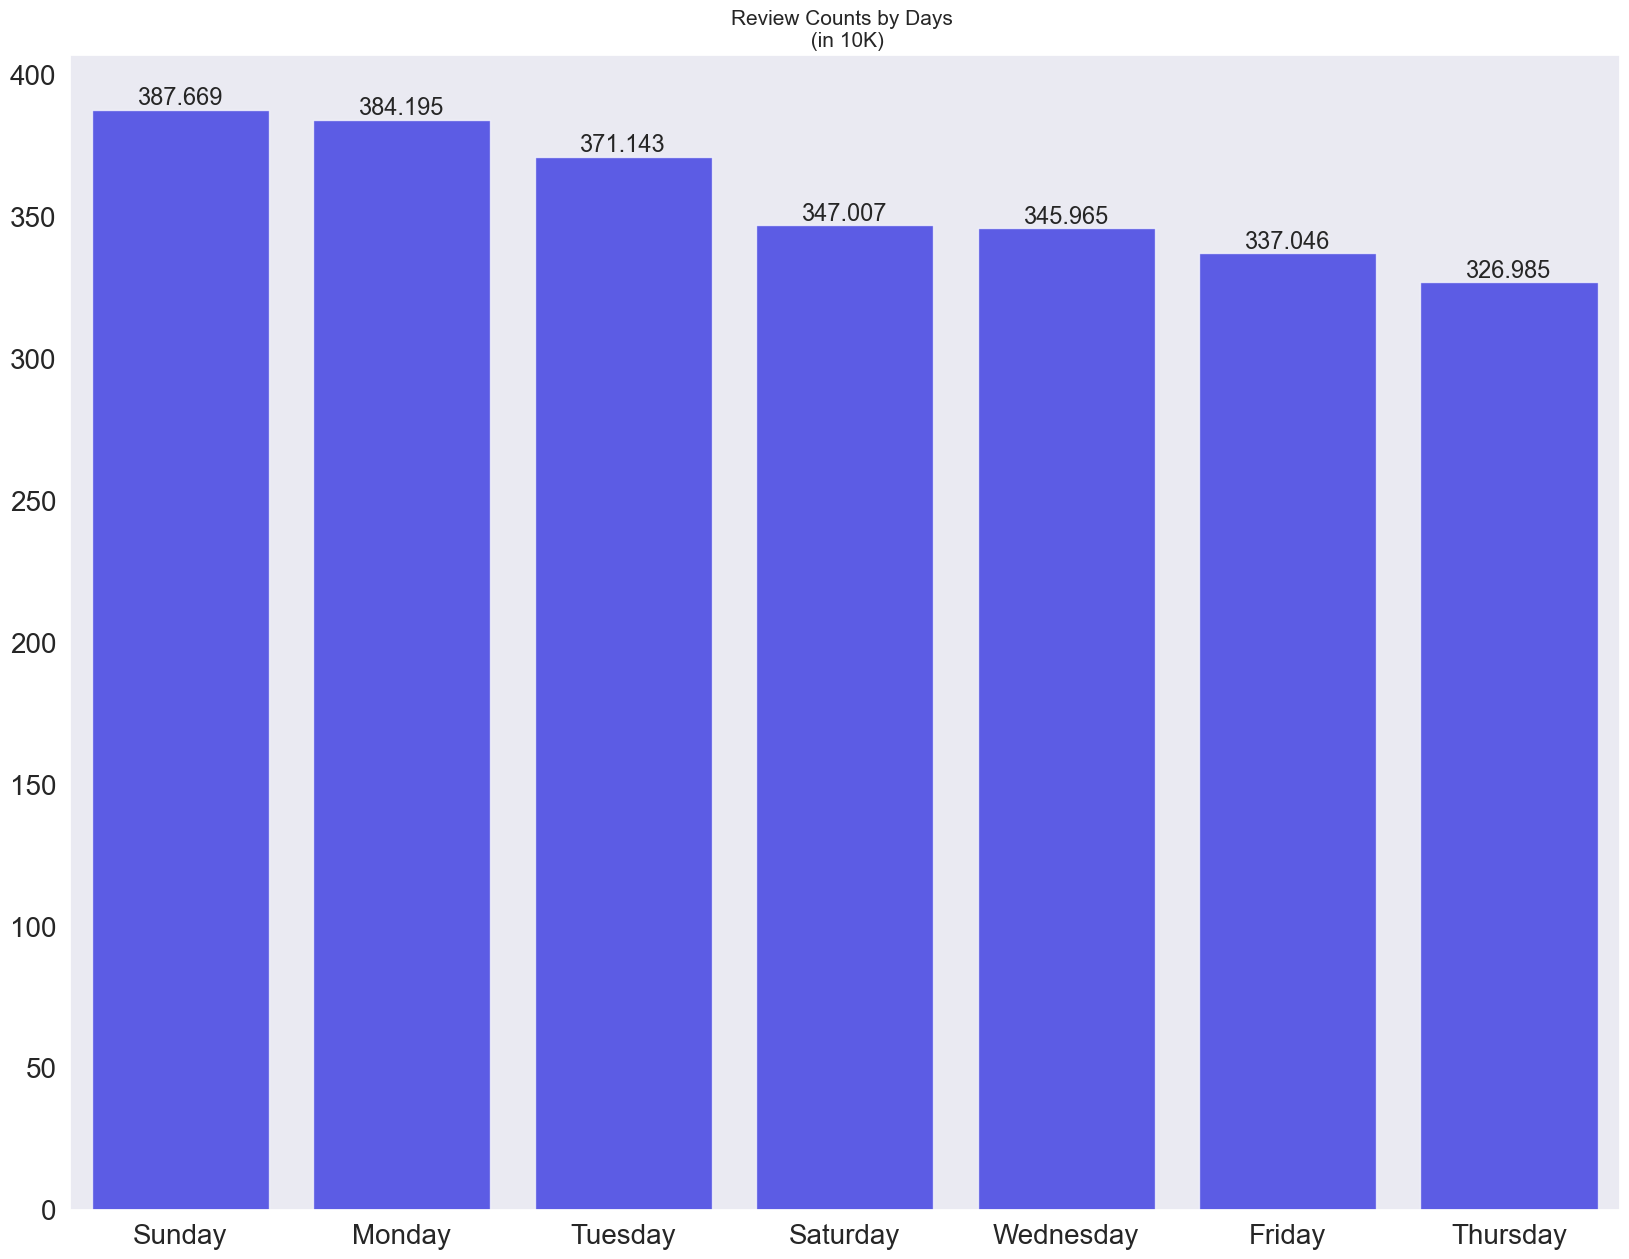

In [38]:
plt.figure(figsize = (20, 15))
plt.title("Review Counts by Days \n (in 10K)", fontsize = 15)
viz_days = sns.barplot(
    x = 'days',
    y = 'freq', 
    data = review_by_days,
    color = 'blue', 
    alpha = 0.7,
    order = review_by_days['days'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for container in viz_days.containers:
    viz_days.bar_label(container, fontsize = 17);

- rating per users

In [39]:
rating_per_user = new_rating.groupby('userId').count()[['movieId']].reset_index()
rating_per_user.columns = ['userId', 'user_movie_counts']

In [40]:
rating_per_user.user_movie_counts.describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: user_movie_counts, dtype: float64

/var/folders/t9/5hgq421x4xsgvkp8nd2kx4fw0000gn/T/ipykernel_4735/4156875390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating_per_user.user_movie_counts, bins = 100,


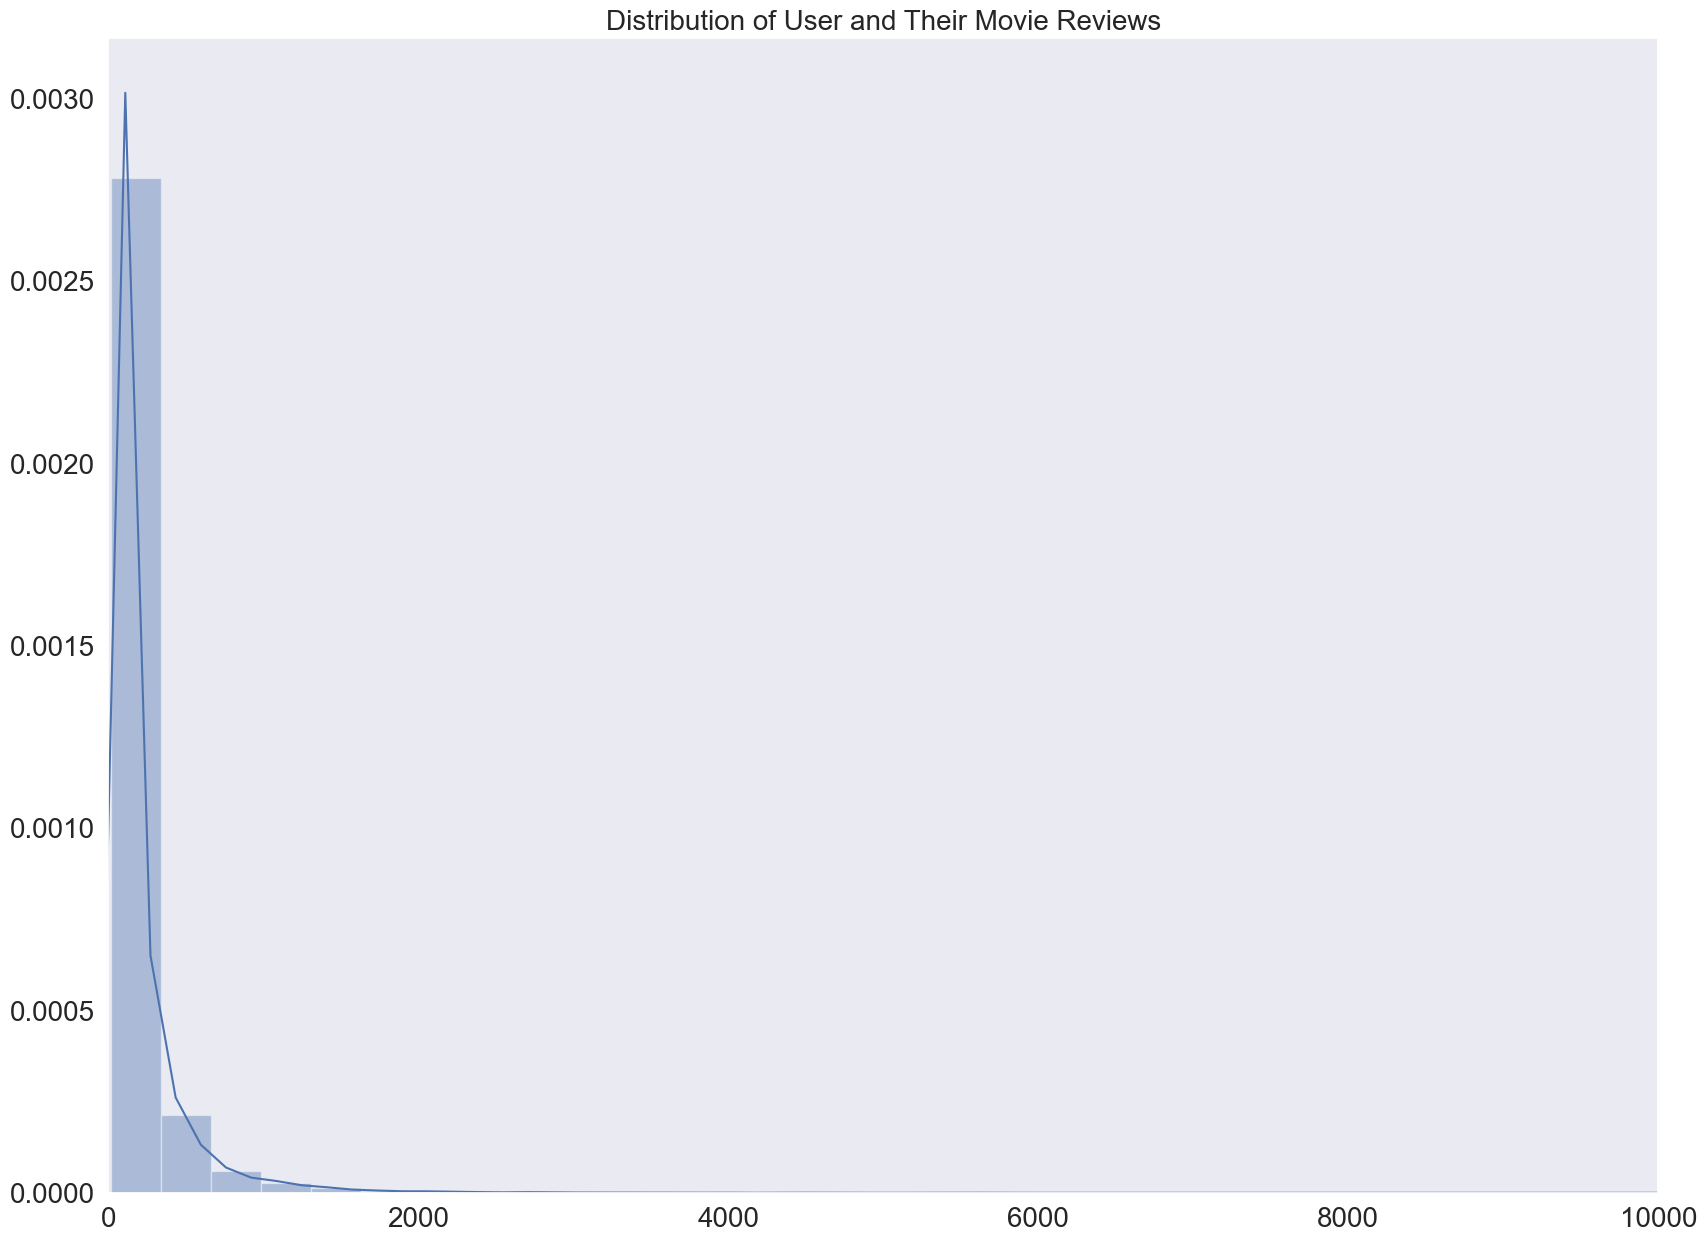

In [41]:
plt.figure(figsize = (20, 15))
plt.title("Distribution of User and Their Movie Reviews", fontsize = 20)
sns.distplot(rating_per_user.user_movie_counts, bins = 100,
             fit_kws={"color":"blue", "alpha":0.7})
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim((0, 10000));

### Export the Dataset

In [42]:
df = pd.merge(new_rating, movie,
         left_on = ['movieId'],
         right_on = ['movieId'])

In [43]:
df_path = '../assets/df.pkl'
df.to_pickle(df_path)